In [ ]:
import tensorflow as tf
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers, regularizers, Input
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

In [ ]:
drive.mount('/content/drive/')
dataset = h5py.File('/content/drive/MyDrive/MNIST_synthetic.h5', 'r')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def refit_label(X,y):
  X_len = X.shape[0]
  new_label = [np.zeros((X_len, 11), dtype=np.uint8) for i in range(5)]
  for i in range(X_len):
    for j in range (5):
        new_label[j][i][y[i][j]] = 1
  return new_label

In [ ]:
learnrate_reduce_1 = ReduceLROnPlateau(monitor='val_dense_1_accuracy', patience=2, verbose=1,factor=0.8, min_lr=0.000001)
learnrate_reduce_2 = ReduceLROnPlateau(monitor='val_dense_3_accuracy', patience=2, verbose=1,factor=0.8, min_lr=0.000001)
learnrate_reduce_3 = ReduceLROnPlateau(monitor='val_dense_5_accuracy', patience=2, verbose=1,factor=0.8, min_lr=0.000001)
learnrate_reduce_4 = ReduceLROnPlateau(monitor='val_dense_7_accuracy', patience=2, verbose=1,factor=0.8, min_lr=0.000001)
learnrate_reduce_5 = ReduceLROnPlateau(monitor='val_dense_9_accuracy', patience=2, verbose=1,factor=0.8, min_lr=0.000001)

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(shape=(64, 64, 1))

conv_1 = Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu')(inputs)
conv_1_1 = Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu')(conv_1)
max_pool_1 = MaxPool2D(pool_size=(2,2),strides=(2,2))(conv_1_1)
drop_out_1 = Dropout(0.25)(max_pool_1)

conv_2 = Conv2D(filters= 128, kernel_size=(3,3), padding='Same', activation='relu')(drop_out_1)
conv_2_2 = Conv2D(filters=128, kernel_size = (3,3), padding='Same',activation="relu")(conv_2)
max_pool_2 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_2_2)
drop_out_2 = Dropout(0.25)(max_pool_2)

conv_3 = Conv2D(filters= 256, kernel_size=(3,3), padding='Same', activation='relu')(drop_out_2)
conv_3_3 = Conv2D(filters= 256, kernel_size=(3,3), padding='Same',activation='relu')(conv_3)
max_pool_3 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_3_3)
drop_out_3 = Dropout(0.25)(max_pool_3)

flatten_3 = Flatten()(drop_out_3)

hidden1 = Dense(512, activation='relu')(flatten_3)
dropout1 = Dropout(0.25)(hidden1)
prediction1 = Dense(11, activation='softmax')(dropout1)


hidden2 = Dense(512, activation='relu')(flatten_3)
dropout2 = Dropout(0.25)(hidden2)
prediction2 = Dense(11, activation='softmax')(dropout2)


hidden3 = Dense(512, activation='relu')(flatten_3)
dropout3 = Dropout(0.25)(hidden3)
prediction3 = Dense(11, activation='softmax')(dropout3)


hidden4 = Dense(512, activation='relu')(flatten_3)
dropout4 = Dropout(0.25)(hidden4)
prediction4 = Dense(11, activation='softmax')(dropout4)


hidden5 = Dense(512, activation='relu')(flatten_3)
dropout5 = Dropout(0.25)(hidden5)
prediction5 = Dense(11, activation='softmax')(dropout5)

model = Model(inputs=inputs, outputs=[prediction1,prediction2,prediction3,prediction4,prediction5])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 64)   0           conv2d_1[0][0]                   
_______________________________________________________________________________________

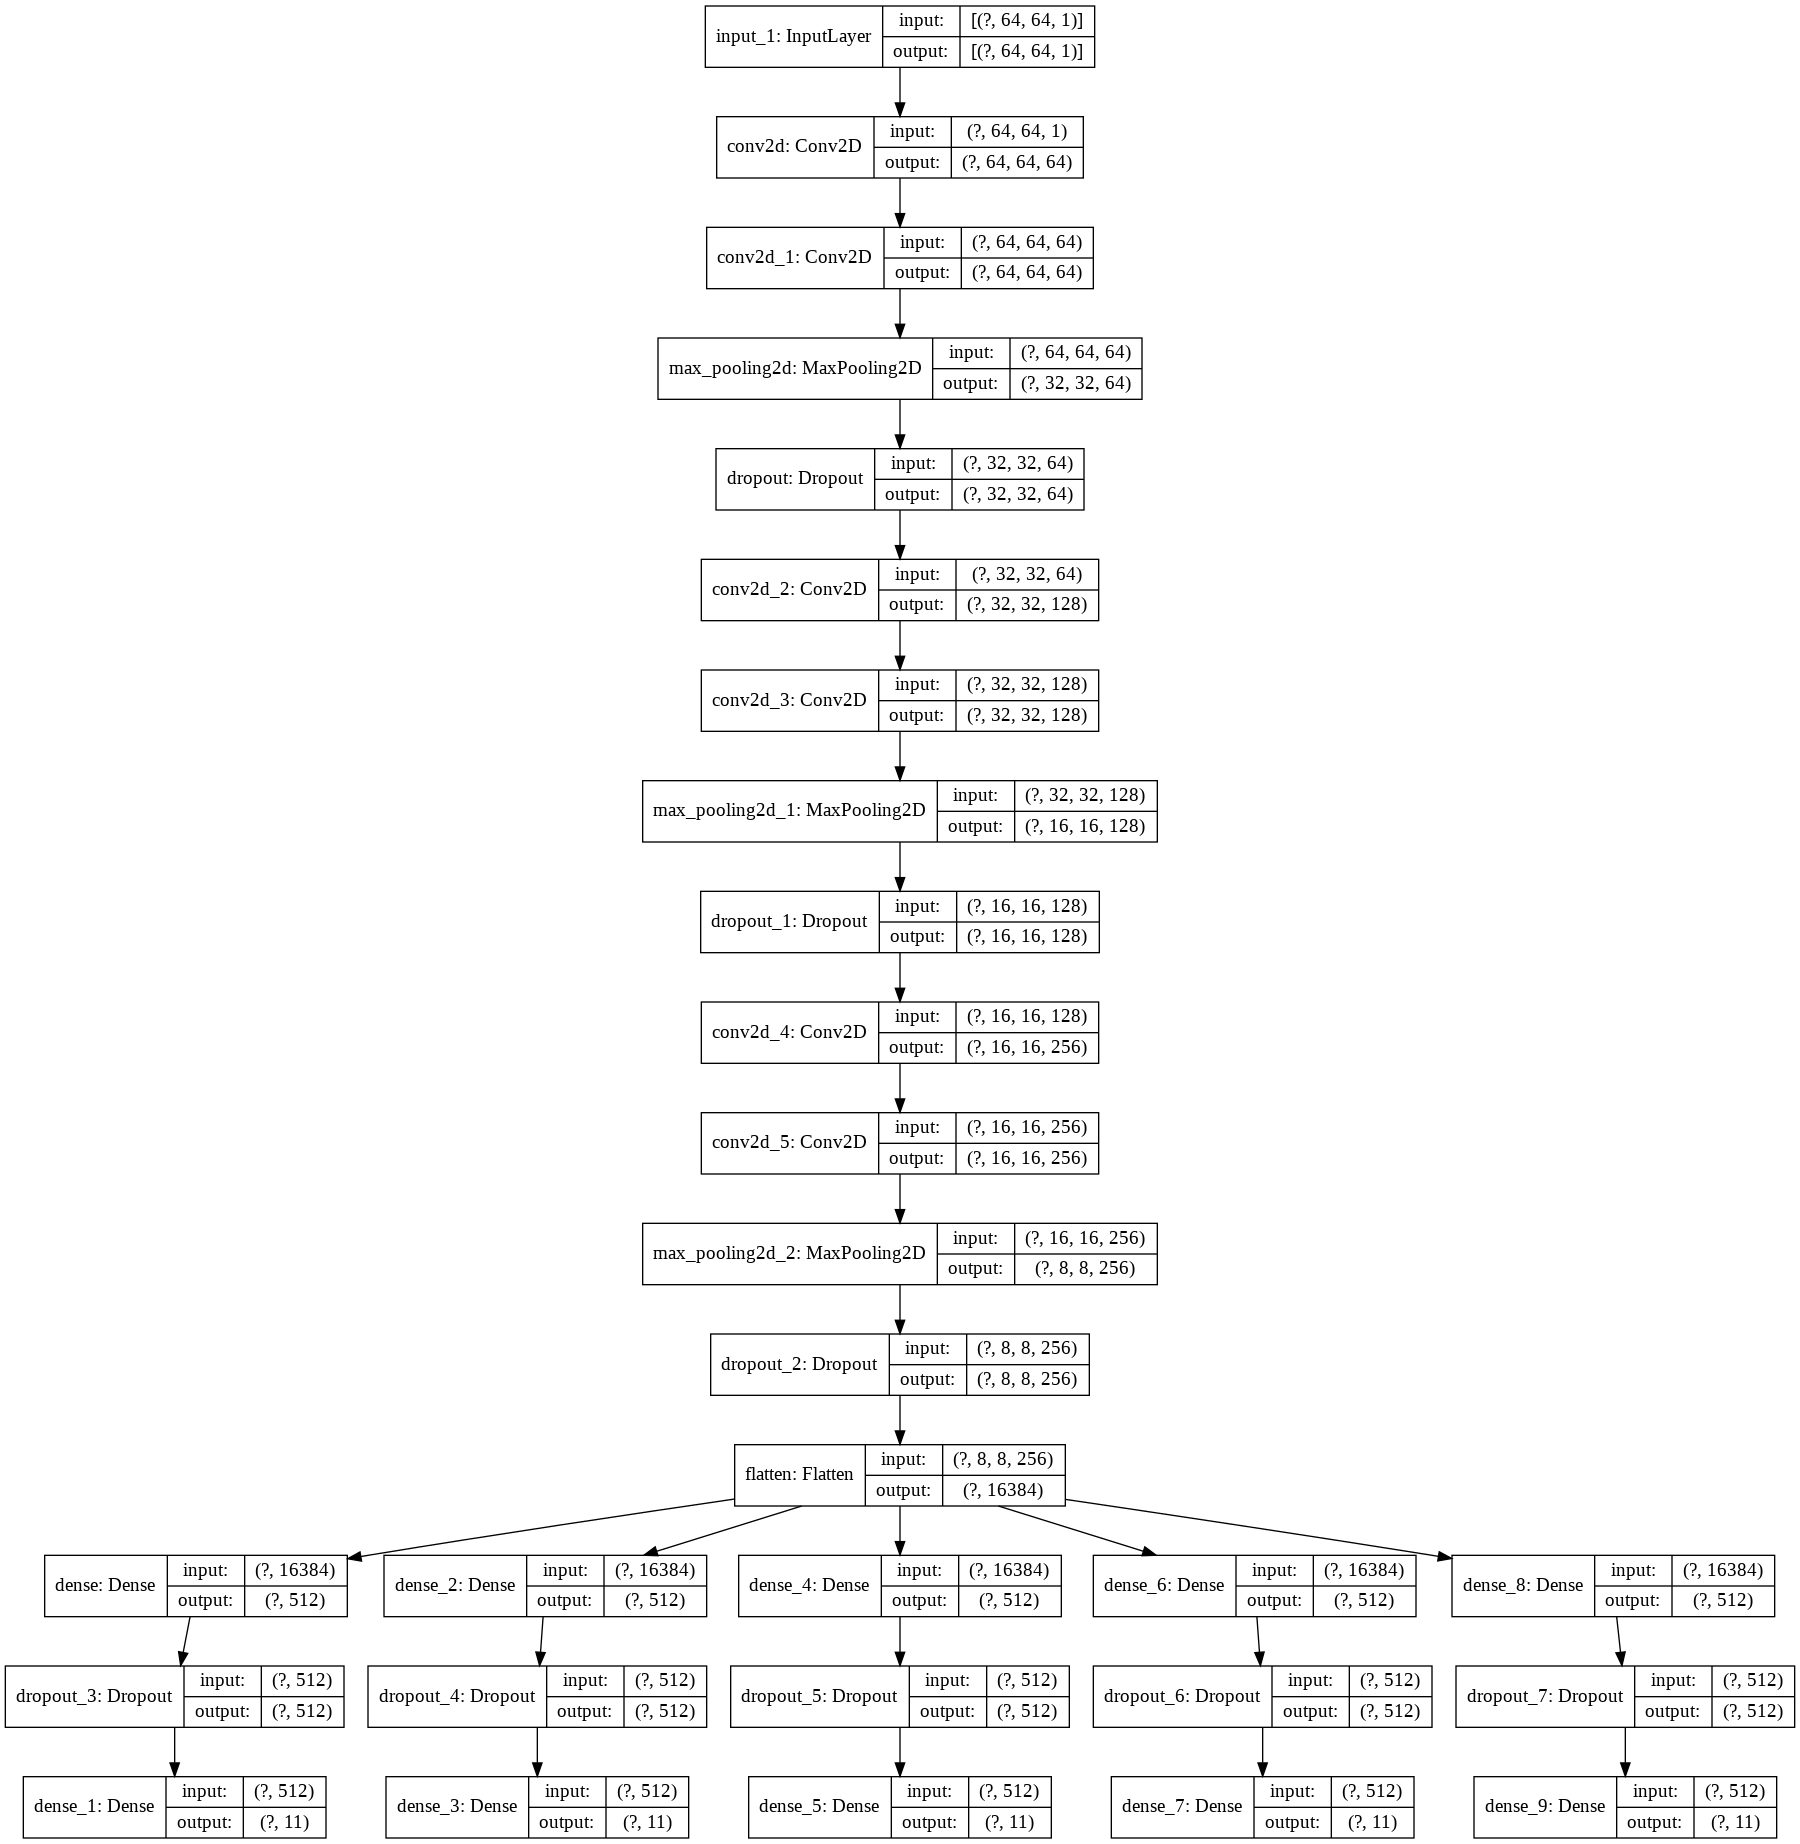

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(dataset['train_dataset'], dataset['train_labels'], test_size=0.2, shuffle=False)
y_train = refit_label(x_train,y_train)
y_val = refit_label(x_val,y_val)

history = model.fit(x_train, y_train, epochs=30, batch_size=128,
          validation_data=(x_val, y_val), 
          callbacks=[learnrate_reduce_1,learnrate_reduce_2,learnrate_reduce_3,learnrate_reduce_4,learnrate_reduce_5], shuffle=False)

Epoch 1/30
350/350 [==============================] - 42s 121ms/step - loss: 4.3338 - dense_1_loss: 1.1385 - dense_3_loss: 1.0842 - dense_5_loss: 0.9359 - dense_7_loss: 0.7560 - dense_9_loss: 0.4191 - dense_1_accuracy: 0.6545 - dense_3_accuracy: 0.6735 - dense_5_accuracy: 0.7558 - dense_7_accuracy: 0.8396 - dense_9_accuracy: 0.9198 - val_loss: 0.3562 - val_dense_1_loss: 0.1285 - val_dense_3_loss: 0.0846 - val_dense_5_loss: 0.0725 - val_dense_7_loss: 0.0428 - val_dense_9_loss: 0.0278 - val_dense_1_accuracy: 0.9638 - val_dense_3_accuracy: 0.9754 - val_dense_5_accuracy: 0.9796 - val_dense_7_accuracy: 0.9883 - val_dense_9_accuracy: 0.9926
Epoch 2/30
350/350 [==============================] - 42s 121ms/step - loss: 0.4260 - dense_1_loss: 0.1329 - dense_3_loss: 0.1120 - dense_5_loss: 0.0912 - dense_7_loss: 0.0607 - dense_9_loss: 0.0291 - dense_1_accuracy: 0.9626 - dense_3_accuracy: 0.9681 - dense_5_accuracy: 0.9744 - dense_7_accuracy: 0.9833 - dense_9_accuracy: 0.9921 - val_loss: 0.1522 - va

[0.25727315 0.88579038 0.93240724 0.94621006 0.95387138 0.95892021
 0.96064921 0.96097509 0.97971272 0.98418157 0.98448886 0.98946227
 0.99063618 0.99096851 0.99267654 0.99285424 0.99507597 0.99485369
 0.9953875  0.99592131 0.99576556 0.995343   0.9961663  0.99589922
 0.99589911 0.99589911 0.99576572 0.99607699 0.99549903 0.99594353]
[0.90326709 0.95687451 0.96571787 0.97217077 0.973131   0.97900564
 0.97567573 0.97725447 0.98711485 0.9887075  0.98968278 0.9908342
 0.99198834 0.99207629 0.99225457 0.99207606 0.99305293 0.99296433
 0.9928755  0.9933197  0.99287527 0.99340858 0.99331979 0.99340852
 0.99349746 0.99349746 0.99367521 0.99358627 0.99367521 0.99367521]


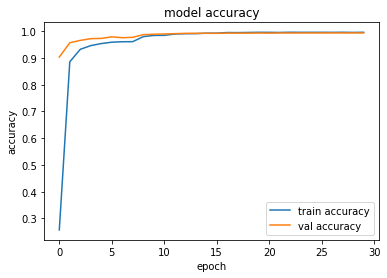

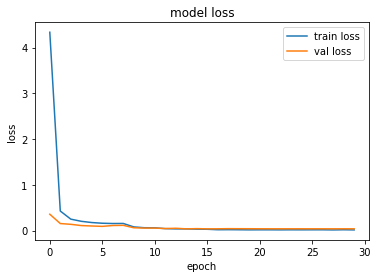

In [ ]:
train_acc = np.array(history.history['dense_1_accuracy'])*np.array(history.history['dense_3_accuracy'])*np.array(history.history['dense_5_accuracy'])*np.array(history.history['dense_7_accuracy'])*np.array(history.history['dense_9_accuracy'])
val_acc = np.array(history.history['val_dense_1_accuracy'])*np.array(history.history['val_dense_3_accuracy'])*np.array(history.history['val_dense_5_accuracy'])*np.array(history.history['val_dense_7_accuracy'])*np.array(history.history['val_dense_9_accuracy'])
print(train_acc)
print(val_acc)

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'],)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'],)
plt.show()



In [ ]:
def get_result(result):
  resultstr = ''
  result_list = []
  for i in range(5):
    result_list.append(np.argmax(result[i]))
  for i in result_list:
    resultstr += str(i)
  print(resultstr)
  return resultstr
X_test = np.array(dataset['test_dataset'])
df = pd.DataFrame(columns=['Label'])
for i in range(X_test.shape[0]):
  print(i)
  y_pred = model.predict(X_test[i].reshape(1,64,64,1))
  df = df.append([{'Label':str(get_result(y_pred))}], ignore_index=True)

df['Label'] = df['Label'].astype(str)
df.to_csv('output.csv', index=True, index_label='Id')

Streaming output truncated to the last 5000 lines.
11500
5771010
11501
510101010
11502
72101010
11503
19101010
11504
7791010
11505
838910
11506
5921010
11507
9221010
11508
2051010
11509
31101010
11510
79413
11511
15101010
11512
22946
11513
199710
11514
910101010
11515
46157
11516
37101010
11517
110101010
11518
167410
11519
710101010
11520
9761010
11521
12101010
11522
44477
11523
16101010
11524
310101010
11525
1871010
11526
541910
11527
93734
11528
10522
11529
310101010
11530
76863
11531
8521010
11532
53101010
11533
1361010
11534
410101010
11535
110101010
11536
75101010
11537
110101010
11538
98276
11539
59101010
11540
58543
11541
088310
11542
1131010
11543
41709
11544
20721
11545
86101010
11546
8411010
11547
54101010
11548
68414
11549
03101010
11550
20101010
11551
83101010
11552
18101010
11553
36928
11554
810101010
11555
39101010
11556
610101010
11557
05101010
11558
810101010
11559
35101010
11560
310101010
11561
03101010
11562
710101010
11563
31101010
11564
807610
11565
176410
11566
600